**Importing Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading the Data**

In [4]:
dom_data = pd.read_csv('/content/diminos_data.csv')
dom_data.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


**Calculate the 95th percentile of the delivery times**

In [6]:
dom_data['order_placed_at'] = pd.to_datetime(dom_data['order_placed_at'])
dom_data['order_delivered_at'] = pd.to_datetime(dom_data['order_delivered_at'])
delivery_time_minutes = (dom_data['order_delivered_at'] - dom_data['order_placed_at']).dt.total_seconds() / 60

percentile_95 = np.percentile(delivery_time_minutes, 95)
print(f"95th Percentile Delivery Time: {percentile_95:.2f} minutes")

95th Percentile Delivery Time: 27.26 minutes


**Compare the result with the benchmark (31 minutes)**

In [7]:
if percentile_95 < 31:
  print("The store is meeting the performance metric.")
else:
  print("The store is NOT meeting the performance metric!")

The store is meeting the performance metric.


**Visualize the delivery time distribution**
#### Plotting a histogram of delivery times

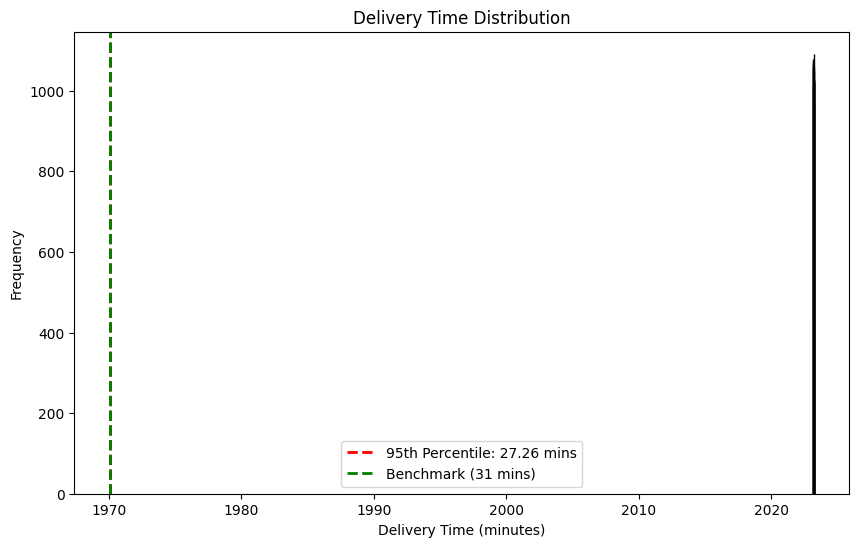

In [13]:
plt.figure(figsize=(10, 6))

plt.hist(dom_data['order_delivered_at'], bins=15, color='skyblue', edgecolor='black')
plt.axvline(percentile_95, color='red', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95:.2f} mins')
plt.axvline(31, color='green', linestyle='dashed', linewidth=2, label="Benchmark (31 mins)")

## Adding labels and title
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

**Analyze and make recommendations**

#### If the 95th percentile is higher than 31 minutes, we can provide insights:

In [14]:
if percentile_95 > 31:
  print("Actionable Insights:")
  print("1. Consider improving delivery routes or hiring additional delivery drivers to reduce time.")
  print("2. Look into peak hours - are orders taking longer during specific times of the day?")
  print("3. Improve communication between the kitchen and delivery drivers to speed up the process.")
  print("4. Investigate any external factors (traffic, weather, etc.) that may be affecting delivery times.")
else:
  print("The store is meeting the performance metric, keep up the good work!")

The store is meeting the performance metric, keep up the good work!
